### Gaussian Random Variable
- 이론과 실제(np.random을 이용한 난수 생성)이 얼마나 유사한지를 비교

* $\mu=0, \sigma=1$인 Standard Normal Random Variable을 위한 rv 변수를 생성한다.
* 사용자가 입력한 size 개수 만큼의 난수를 생성하여 rvals1에 저장한다.
* size * 10 만큼의 난수를 생성하여 rvals2에 저장한다.
* bins = np.linspace(-4\*sigma, 4\*sigma, 41)로 [-4\*sigma, 4\*sigma]의 구간을 40개의 bins로 구분하여 난수의 도수 분포를 구한다. 
* 난수 생성 결과의 도수 분포 비율을 이론적인 확률값과 비교하는 그래프를 그린다.

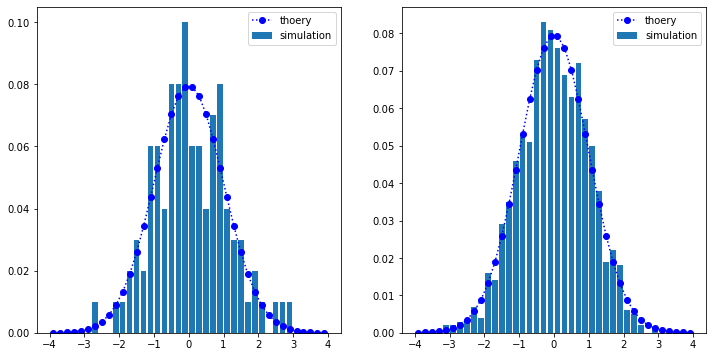

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(seed=1000)
mu = 0
sigma = 1

size = 100#@param {type:"integer"}

rv = stats.norm(mu,sigma)
bins = np.linspace(-4*sigma, 4*sigma, 41)

rvals1 = rv.rvs(size=size)
rvals2 = rv.rvs(size=size*10)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 
l1 = [0 for _ in range(40)]
l2 = [0 for _ in range(40)]
# print(bins)
for i in range(len(bins)-1):
    for j in range(len(rvals1)):
        if bins[i] <= rvals1[j] < bins[i+1]:
            l1[i] += 1
    l1[i] /= size
# print(l1)

for i in range(len(bins)-1):
    for j in range(len(rvals2)):
        if bins[i] <= rvals2[j] < bins[i+1]:
            l2[i] += 1
    l2[i] /= size*10
# print(l2)

ax1.hist(bins[:-1], bins, weights = l1, rwidth=0.8, label = 'simulation')
ax2.hist(bins[:-1], bins, weights = l2, rwidth=0.8, label = 'simulation')

ax1.plot((bins[1:]+bins[:-1])/2, rv.cdf(bins[1:])-rv.cdf(bins[:-1]), 'b:o', label='thoery')
ax1.legend()

ax2.plot((bins[1:]+bins[:-1])/2, rv.cdf(bins[1:])-rv.cdf(bins[:-1]), 'b:o', label='thoery')
ax2.legend()

#============================================ 

plt.show()